<a href="https://colab.research.google.com/github/KivalovIlya/math_learn/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [Life Expectancy](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)


1.   Проверить гипотезу, что страны с высоким употреблением алкоголя(>8) в среднем имеют среднюю продолжительность жизни меньше, чем страны с низким употреблением алкоголя(<4)
2.   Рассчитать и проанализировать и сравнить различные статистические показатели за 2001 и 2015 годы
3.   Рассмотреть и проанализировать линейные взаимосвязи в данных
4.   Предсказать значения по выбранной линейной взаимосвязи





### Загрузка датасета

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Life Expectancy Data.csv')

### Рассмотроим данные и проверим гипотезу

In [101]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Построим гистограмму для наглядного распределения значений употребления алкоголя

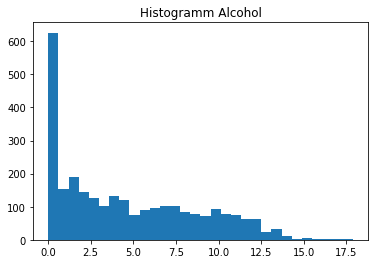

In [19]:
import matplotlib.pyplot as plt

plt.hist(df['Alcohol'], bins=30)
plt.title('Histogramm Alcohol')
plt.show()

Расчитаем среднюю продолжительность жизни во всех странах с употреблением алкоголя меньше 4 (в литрах чистого спирта)

In [31]:
df[df['Alcohol'] < 4]['Life expectancy '].mean()

66.07963483146067

Расчитаем среднюю продолжительность жизни во всех странах с употреблением алкоголя больше 8, но меньше 12 (в литрах чистого спирта)

In [41]:
df[(df['Alcohol'] > 8) & (df['Alcohol'] < 12)]['Life expectancy '].mean()

75.33443579766538

Расчитаем среднюю продолжительность жизни во всех странах с употреблением алкоголя больше 12 (в литрах чистого спирта)

In [34]:
df[df['Alcohol'] > 12]['Life expectancy '].mean()

76.20223880597015

В результате получаем большое различие в возрасте жизни при среднем употреблении алкоголя на душу населения. Гипотеза отвергается.
Также интересно заметить, что разница при низком и высоком употреблении составляет порядка 10 лет.

###  Расчитаем различные статистические данные по средней продолжительности жизни на 2015 год и сравним с 2001.

In [55]:
def stat(df, year):
  print(f'{df[df["Year"] == year]["Life expectancy "].mean()} - средее')
  print(f'{df[df["Year"] == year]["Life expectancy "].median()} - медиана')
  print(f'{df[df["Year"] == year]["Life expectancy "].std()} - среднеквадратичное отклонение')
  print(f'{df[df["Year"] == year]["Life expectancy "].var()} - дисперсия')
  print(f'{df[df["Year"] == year]["Life expectancy "].max()} - максимальное')
  print(f'{df[df["Year"] == year]["Life expectancy "].min()} - минимальное')


In [56]:
stat(df, 2001)

67.1289617486339 - средее
71.2 - медиана
10.189629640610816 - среднеквадратичное отклонение
103.82855221281451 - дисперсия
82.0 - максимальное
41.0 - минимальное


In [57]:
stat(df, 2015)

71.61693989071038 - средее
73.9 - медиана
8.123706147645304 - среднеквадратичное отклонение
65.9946015732901 - дисперсия
88.0 - максимальное
51.0 - минимальное


За 14 лет минимальный значение среднего возраста жизни увеличилось на 10 лет.
Средняя продолжительности жизни возраста на 4.5 года.


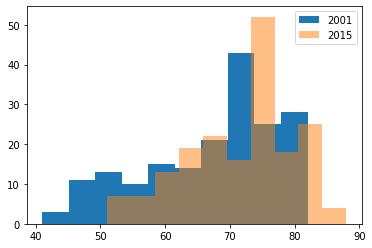

In [69]:
plt.hist(df[df['Year'] == 2001]['Life expectancy '])
plt.hist(df[df['Year'] == 2015]['Life expectancy '], alpha=0.5)
plt.legend(['2001', '2015'])
plt.show()

14 лет спустя средняя продолжитель жизни по странам имеет более нормальное распределение, а также меньший разброс данных, как собственно и показали расчеты среднеквадратического отклонения и дисперсии.

### Рассмотрим и проанализируем линейные взаимосвязи наших данных

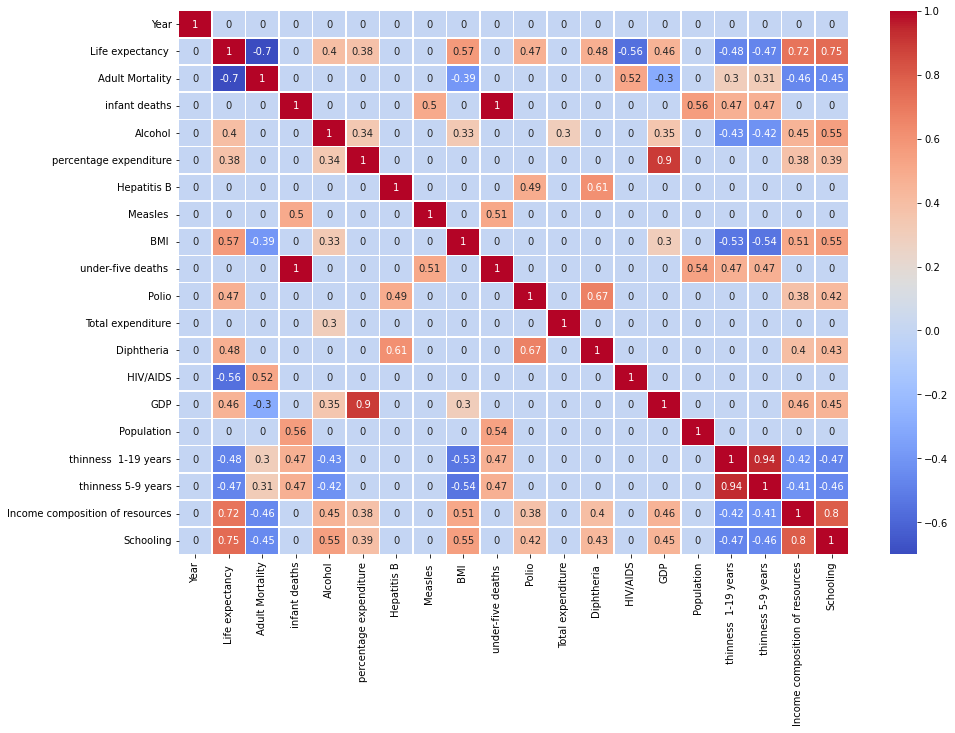

In [71]:
import seaborn as sns

plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 #зависимости с коэф. < 0.3 заменим на ноль, чтобы не отвлекали.
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, cmap='coolwarm')

Исследуем зависимость худобы 5-9 лет и 1-19 лет

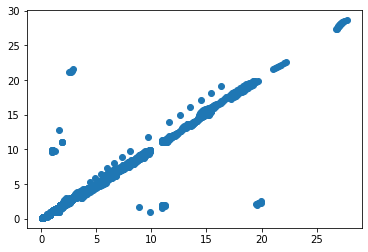

In [84]:
#построим график
plt.scatter(df[' thinness  1-19 years'], df[' thinness 5-9 years'])

На графике отслеживается практически идеальная полная линейная зависимость.
Как и показала нам тепловая карта.
Рассчитаем коэфициенты b0, b1.

In [128]:
import numpy as np

#занесем значения в переменные
x = np.array(df[' thinness  1-19 years'].tolist())
y = np.array(df[' thinness 5-9 years'].tolist())

#удалим строки со значением NaN
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

Воспользуемся формулой парной регрессии

$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$


In [113]:
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
print(b1, b0)

0.9579442085869376 0.2341505235588448


В результате получаем следующее:

$$y = 0.2341505235588448 + 0.9579442085869376 \cdot x$$

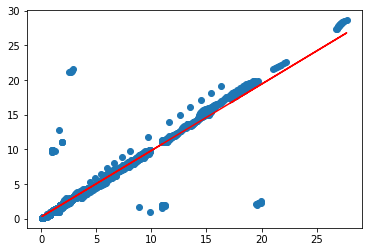

In [116]:
yo = b0 + b1 * x

plt.scatter(df[' thinness  1-19 years'], df[' thinness 5-9 years'])
plt.plot(x, yo, color='red')

### Предскажем значения по полученным коэф. и расчитаем оценку

In [118]:
#pred:
pred = list()
for el in x:
  pred.append(int(0.2341505235588448 + 0.9579442085869376*el))

predict = np.array(pred)

In [124]:
#посчитаем R
R = predict.var() / y.var()
R

0.8776150897961899

Коэффициент детерминации, равный $0.877$, означает, что $87 \%$ дисперсии переменной $y$ _учитывается_ или _объясняется_ моделью.

In [125]:
#посчитает r2_score (детерминацию)
from sklearn.metrics import r2_score

r2 = r2_score(y, predict)
r2

0.8679746086579714

👌

In [126]:
#расчитаем ошибку апроксимации

def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

mean_approximation_error(y, predict)

0.24739942448495822

Ошибка составила 24%. Это связанно с данными выбросами:
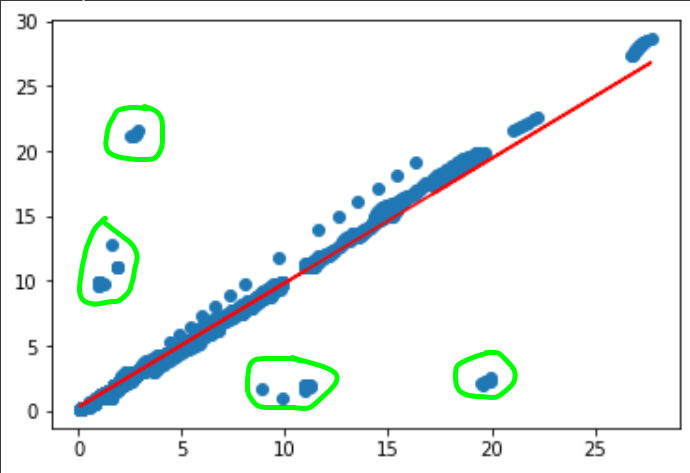

 Воспользуемся __F-критерием Фишера__ для оценки значимости получившегося уравнения регрессии

 $$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k},$$

In [130]:
k1 = 1
k2 = 2904 - 1 - 1

T1 = (R / (1 - R)) * (k2 / k1)
T1

20810.073614036555

In [131]:
from scipy import stats

alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit 

3.844665191096167

Очевидная высокая значимость